In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
ax = rc("font", family="serif", size=11)

In [111]:
N = 360
C = 10
alpha = 10
beta = 0.05

f = np.linspace(0, np.pi*C, N)

def sine(f,alpha):
    return alpha*np.sin(f)
def expn(f,beta):
    return np.exp(-2 * beta**2 * f**2)

decay = sine(f,alpha) * expn(f,beta)

f_sg = 1
f_true = np.random.randn(N) * f_sg + sine(f,alpha)
f_obs_sg = np.ones(N) * 3
f_obs = f_true + np.random.randn(N) * f_obs_sg

y = sin(wt - phi)

Let's add some noise to the data.

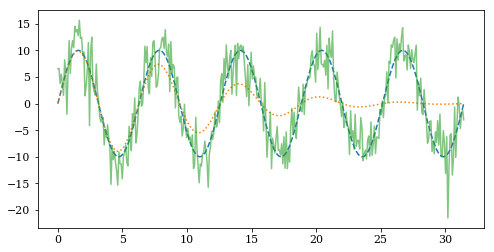

In [112]:
plt.figure(1, figsize=(8,4))
plt.plot(f, sine(f,alpha), '--', f, decay, ':')
plt.plot(f, f_obs, alpha=0.6)
plt.show()

Equation given in Broomhall paper, referenced from Houdek 2008, for second frequency differences $\Delta_2$ is
\begin{equation*}
\Delta_2 \omega_{n,l} = A\omega_{n,l} e^{-2b^2\omega_{n,l}^2} \cos \left[2\left(\tau_{\textrm{He II}}\omega_{n,l}+d\right)\right]+K
\end{equation*}

In [104]:
code = '''
functions {
    real sine(real freq, real A){
        return A * sin(freq);
    }
}
data {
    int N;
    real f[N];
}
parameters {
    real<lower = 0> freq;
    real ln_height;
}
transformed parameters {
    real height;
    height = exp(ln_height);
}
model {
    freq ~ normal(15.0, 4.0);
    ln_height ~ normal(10.0, 0.3);
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e39a17de6429ec4737f7388c9bd38be0 NOW.


KeyboardInterrupt: 